# Titanic challenge
Data engineering and training the machine learning model

# 1. Setup

## Import dependencies

In [50]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt

## Load training data

In [51]:
train_data_file = "train.csv"
train_data = pd.read_csv(train_data_file)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. Data engineering

## Count NaN values in consecutive columns

In [52]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Select rows with *Miss* in name

In [53]:
search_miss = train_data[train_data["Name"].str.contains("Miss", case = False)].copy()
search_miss.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q


## Frome above set select rows where *Age* is NaN

In [54]:
misses_w_age = search_miss[search_miss["Age"].isnull()].copy()
misses_w_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q


## Generate random *Age* values in the range from 1 to 20 years

In [55]:
misses_w_age["Age"] = misses_w_age["Age"].apply(lambda x: np.random.randint(1, 21) if pd.isnull(x) else x)
misses_w_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,19,0,0,330959,7.8792,NaN,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,1,0,0,335677,7.7500,NaN,Q
47,48,1,3,"O'Driscoll, Miss. Bridget",female,18,0,0,14311,7.7500,NaN,Q
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,7,0,0,330932,7.7875,NaN,Q
109,110,1,3,"Moran, Miss. Bertha",female,20,1,0,371110,24.1500,NaN,Q


## Combine above set with training data

In [56]:
train_data = train_data.combine_first(misses_w_age)

## Fill NaN in Age column with other, not-NaN value sampled randomly

The following line applies anonymous function to all values in the Age column. If current value (**x**) is not NaN, it will be just passed back (**else x** part). If it is NaN (**if np.isnan(x)**), random value (**random.choice**) from all the not-NaN values (**train_data["Age"].dropna().values**) will be passed back.

In [57]:
train_data["Age"] = train_data["Age"].apply(lambda x: np.random.choice(train_data["Age"].dropna().values) if pd.isnull(x) else x)

## Fill NaN in Embarked column with random port symbol

The following line uses the same technic as described above, although port symbol is randomly selected from the provided tuple.

In [58]:
train_data["Embarked"] = train_data["Embarked"].apply(lambda x: np.random.choice(("S", "C", "Q")) if pd.isnull(x) else x)

## Check if any NaN values are present

In [59]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Quantify Sex data

In [60]:
train_data["Is_male"] = (train_data["Sex"] == "male").astype(int)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_male
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,1
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.0000,NaN,S,1
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.0000,B42,S,0
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,17.0,1.0,2.0,W./C. 6607,23.4500,NaN,S,0
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.0000,C148,C,1


## Quantify Embarked data

In [61]:
train_data["Embarked_S"] = (train_data["Embarked"] == "S").astype(int)
train_data["Embarked_C"] = (train_data["Embarked"] == "C").astype(int)
train_data["Embarked_Q"] = (train_data["Embarked"] == "Q").astype(int)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_male,Embarked_S,Embarked_C,Embarked_Q
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,1,1,0,0
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,0,0,1,0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,0,1,0,0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.0000,NaN,S,1,1,0,0
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.0000,B42,S,0,1,0,0
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,17.0,1.0,2.0,W./C. 6607,23.4500,NaN,S,0,1,0,0
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.0000,C148,C,1,0,1,0


## Normalize Pclass

In [62]:
train_data["Pclass_norm"] = train_data["Pclass"] / 3
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_male,Embarked_S,Embarked_C,Embarked_Q,Pclass_norm
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,1,1,0,0,1.000000
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,0,0,1,0,0.333333
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1.000000
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,0,1,0,0,0.333333
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S,1,1,0,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0.0,211536,13.0000,NaN,S,1,1,0,0,0.666667
887,888.0,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0.0,112053,30.0000,B42,S,0,1,0,0,0.333333
888,889.0,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,17.0,1.0,2.0,W./C. 6607,23.4500,NaN,S,0,1,0,0,1.000000
889,890.0,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0.0,111369,30.0000,C148,C,1,0,1,0,0.333333


## Drop unnecessary columns

In [63]:
train_data = train_data.drop(columns = ["PassengerId", "Name", "Ticket", "Cabin", "Pclass", "Sex", "Embarked"])
train_data

,Survived,Age,SibSp,Parch,Fare,Is_male,Embarked_S,Embarked_C,Embarked_Q,Pclass_norm
0,0.0,22.0,1.0,0.0,7.2500,1,1,0,0,1.000000
1,1.0,38.0,1.0,0.0,71.2833,0,0,1,0,0.333333
2,1.0,26.0,0.0,0.0,7.9250,0,1,0,0,1.000000
3,1.0,35.0,1.0,0.0,53.1000,0,1,0,0,0.333333
4,0.0,35.0,0.0,0.0,8.0500,1,1,0,0,1.000000
...,...,...,...,...,...,...,...,...,...,...
886,0.0,27.0,0.0,0.0,13.0000,1,1,0,0,0.666667
887,1.0,19.0,0.0,0.0,30.0000,0,1,0,0,0.333333
888,0.0,17.0,1.0,2.0,23.4500,0,1,0,0,1.000000
889,1.0,26.0,0.0,0.0,30.0000,1,0,1,0,0.333333


## Shuffle the data

In [64]:
train_data = train_data.sample(frac = 1)
train_data

,Survived,Age,SibSp,Parch,Fare,Is_male,Embarked_S,Embarked_C,Embarked_Q,Pclass_norm
335,0.0,21.00,0.0,0.0,7.8958,1,1,0,0,1.000000
541,0.0,9.00,4.0,2.0,31.2750,0,1,0,0,1.000000
222,0.0,51.00,0.0,0.0,8.0500,1,1,0,0,1.000000
301,1.0,25.00,2.0,0.0,23.2500,1,0,0,1,1.000000
260,0.0,2.00,0.0,0.0,7.7500,1,0,0,1,1.000000
...,...,...,...,...,...,...,...,...,...,...
136,1.0,19.00,0.0,2.0,26.2833,0,1,0,0,0.333333
306,1.0,6.00,0.0,0.0,110.8833,0,0,1,0,0.333333
630,1.0,80.00,0.0,0.0,30.0000,1,1,0,0,0.333333
142,1.0,24.00,1.0,0.0,15.8500,0,1,0,0,1.000000


## Select data to train the model

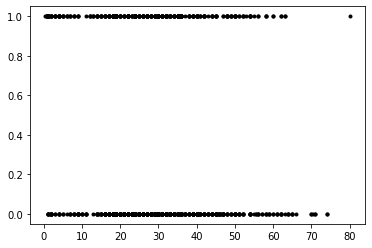

In [65]:
# Select inputs
input_values = train_data.drop(columns = ["Survived"])

# Select label values
label_values = train_data["Survived"]

# Plot data
plt.plot(input_values["Age"], label_values, "k.")
plt.show()

## Split data for training, validation and testing

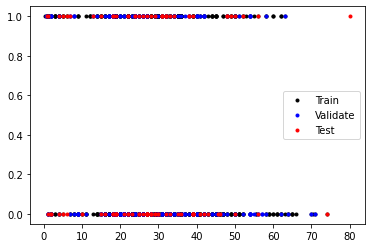

In [66]:
SAMPLES = train_data.shape[0]

# 65% for training
TRAIN_SPLIT = int(0.65 * SAMPLES)
# 25% for testing (so next division at 65% + 25% = 90%)
TEST_SPLIT = int(0.25 * SAMPLES + TRAIN_SPLIT)

# Create data sets for training, validation and testing
input_train, input_validate, input_test = np.split(input_values, [TRAIN_SPLIT, TEST_SPLIT])
label_train, label_validate, label_test = np.split(label_values, [TRAIN_SPLIT, TEST_SPLIT])

# Plot
plt.plot(input_train["Age"], label_train, "k.", label="Train")
plt.plot(input_validate["Age"], label_validate, "b.", label="Validate")
plt.plot(input_test["Age"], label_test, "r.", label="Test")
plt.legend()
plt.show()

# 3. Machine learning model training

## Define the ML model

In [67]:
from tensorflow.keras import layers

model = tf.keras.Sequential()

model.add(layers.Dense(12, activation = "relu", input_shape = (9,)))
model.add(layers.Dense(8, activation = "relu"))
model.add(layers.Dense(4, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 12)                120       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


## Train the ML model

In [68]:
titanic2_ml = model.fit(input_train, label_train, epochs = 200, batch_size = 32, validation_data = (input_validate, label_validate))

Epoch 1/200
19/19 [==============================] - 1s 12ms/step - loss: 1.5505 - accuracy: 0.3368 - val_loss: 1.0556 - val_accuracy: 0.3829
Epoch 2/200
19/19 [==============================] - 0s 3ms/step - loss: 1.0012 - accuracy: 0.3782 - val_loss: 0.8489 - val_accuracy: 0.4009
Epoch 3/200
19/19 [==============================] - 0s 3ms/step - loss: 0.8384 - accuracy: 0.3731 - val_loss: 0.7356 - val_accuracy: 0.4324
Epoch 4/200
19/19 [==============================] - 0s 3ms/step - loss: 0.7525 - accuracy: 0.4352 - val_loss: 0.6763 - val_accuracy: 0.6486
Epoch 5/200
19/19 [==============================] - 0s 3ms/step - loss: 0.7042 - accuracy: 0.5820 - val_loss: 0.6494 - val_accuracy: 0.7342
Epoch 6/200
19/19 [==============================] - 0s 3ms/step - loss: 0.6751 - accuracy: 0.6718 - val_loss: 0.6395 - val_accuracy: 0.7477
Epoch 7/200
19/19 [==============================] - 0s 3ms/step - loss: 0.6706 - accuracy: 0.6960 - val_loss: 0.6358 - val_accuracy: 0.7568
Epoch 8/200


## Output analysis

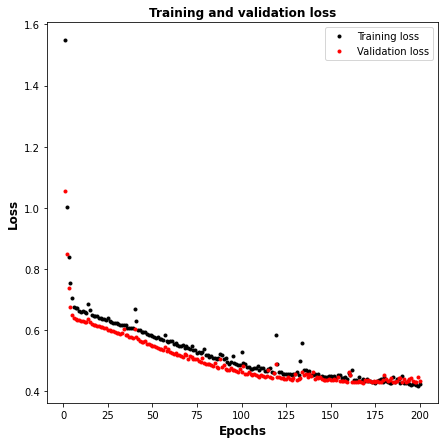

In [69]:
loss = titanic2_ml.history["loss"]
val_loss = titanic2_ml.history["val_loss"]
epochs = range(1, len(loss) + 1)

fig, ax1 = plt.subplots(1, 1, figsize = (7,7))

ax1.plot(epochs, loss, "k.", label = "Training loss")
ax1.plot(epochs, val_loss, "r.", label = "Validation loss")
ax1.set_title("Training and validation loss", size = 12, fontweight = "bold")
ax1.set_xlabel("Epochs", size = 12, fontweight = "bold")
ax1.set_ylabel("Loss", size = 12, fontweight = "bold")
ax1.legend(loc='upper right')
plt.show()

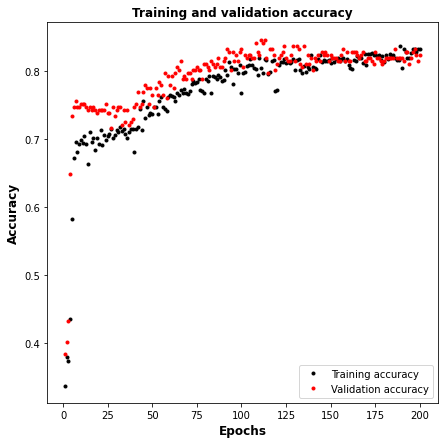

In [70]:
accuracy = titanic2_ml.history["accuracy"]
val_accuracy = titanic2_ml.history["val_accuracy"]
epochs = range(1, len(accuracy) + 1)

fig, ax1 = plt.subplots(1, 1, figsize = (7,7))

ax1.plot(epochs, accuracy, "k.", label = "Training accuracy")
ax1.plot(epochs, val_accuracy, "r.", label = "Validation accuracy")
ax1.set_title("Training and validation accuracy", size = 12, fontweight = "bold")
ax1.set_xlabel("Epochs", size = 12, fontweight = "bold")
ax1.set_ylabel("Accuracy", size = 12, fontweight = "bold")
ax1.legend(loc='lower right')
plt.show()

## Save model to file

In [71]:
model_filename = "ML_model_titanic2"

model.save(model_filename)

INFO:tensorflow:Assets written to: ML_model_titanic2\assets
